# 10 minutes to pandas
## pandas 的数据类型

## `Series` 序列


In [7]:
import numpy as np
import pandas as pd
s = pd.Series([1,4,2,'aab',3.23,np.nan])
print(s)

0       1
1       4
2       2
3     aab
4    3.23
5     NaN
dtype: object


Creating a `Series` by passing a list of values, letting pandas create a default integer index:

通过一个List来创建序列 `Series`

In [8]:
s = pd.Series([1,4,2,3.23,np.nan])
print(s)

0    1.00
1    4.00
2    2.00
3    3.23
4     NaN
dtype: float64


## `DataFrame`
Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns:

### `DataFrame` 

In [11]:
dates = pd.date_range('20190918', periods = 12)
print(dates)

DatetimeIndex(['2019-09-18', '2019-09-19', '2019-09-20', '2019-09-21',
               '2019-09-22', '2019-09-23', '2019-09-24', '2019-09-25',
               '2019-09-26', '2019-09-27', '2019-09-28', '2019-09-29'],
              dtype='datetime64[ns]', freq='D')


In [58]:
data_frame = pd.DataFrame(np.random.normal(1, 0.01, (12,3)), index = dates, columns = list('ABC'))

In [59]:
print(data_frame)

                   A         B         C
2019-09-18  1.001158  1.006573  1.006685
2019-09-19  1.010516  1.004139  0.997892
2019-09-20  0.978722  0.997961  0.989980
2019-09-21  0.991676  1.022449  1.001595
2019-09-22  1.004471  0.999353  1.005910
2019-09-23  1.003834  1.003101  0.992711
2019-09-24  0.979758  0.998852  1.003500
2019-09-25  1.004067  0.990846  0.989931
2019-09-26  0.998360  1.006211  0.984090
2019-09-27  1.017208  1.001541  1.009174
2019-09-28  0.998439  1.002041  0.997482
2019-09-29  0.992819  1.020048  1.002262


In [36]:
#也可以用一个 dict 来初始化
data_frame2 = pd.DataFrame({'A': 1.,
                      'B': pd.Timestamp('20130102'),
                      'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                     'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})
print(data_frame2)
print(data_frame2.dtypes)

     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo
A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object


In [37]:
data_frame2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [38]:
x = np.array([[1,3,6.0,2],[2,3,4,5]])


In [39]:
#不同维度最大值
np.max(x, 0)

array([2., 3., 6., 5.])

查看前面几行也最后几行数据view the top and bottom rows of the frame:

In [41]:
data_frame.head()


,A,B,C
2019-09-18,-1.203979,0.413776,-1.181440
2019-09-19,-0.516228,-1.282906,-0.089330
2019-09-20,0.070951,1.429626,-0.650172
2019-09-21,-0.451434,-0.104314,1.664026
2019-09-22,-0.712182,0.503345,0.694321


In [42]:
data_frame2.tail(2)

,A,B,C,D,E,F
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


显示索引、列和底层的 numpy 数据：

In [44]:
data_frame2.index

Int64Index([0, 1, 2, 3], dtype='int64')

In [46]:
data_frame2.columns

Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')

DataFrame.to_numpy（）给出了底层数据的NumPy表示。 请注意，当您的DataFrame具有不同数据类型的列时，这可能是一项昂贵的操作，

In [47]:
data_frame2.to_numpy()
#relatively expensive. with different data type

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

这归结为pandas和NumPy之间的根本区别：NumPy数组对整个数组有一个dtype，而pandas DataFrames每列有一个dtype。 当您调用DataFrame.to_numpy（）时，pandas将找到可以容纳DataFrame中所有dtypes的NumPy dtype。 这可能最终成为对象，这需要将每个值都转换为Python对象。 对于df，我们的所有浮点值的DataFrame，DataFrame.to_numpy（）都很快，不需要复制数据

In [48]:
data_frame2.values

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [65]:
data_frame.to_numpy()
#this is cheap, because floating-point value

array([[1.00115816, 1.00657274, 1.00668498],
       [1.01051598, 1.00413879, 0.99789216],
       [0.97872156, 0.99796129, 0.98997972],
       [0.9916764 , 1.0224492 , 1.00159458],
       [1.00447072, 0.99935333, 1.00590967],
       [1.00383353, 1.00310139, 0.99271068],
       [0.97975787, 0.99885217, 1.00350006],
       [1.00406735, 0.990846  , 0.98993087],
       [0.9983597 , 1.00621069, 0.98408954],
       [1.01720807, 1.00154134, 1.00917436],
       [0.99843932, 1.00204077, 0.99748246],
       [0.99281862, 1.02004775, 1.00226161]])

In [50]:
data_frame.T
#转置数据

,2019-09-18 00:00:00,2019-09-19 00:00:00,2019-09-20 00:00:00,2019-09-21 00:00:00,2019-09-22 00:00:00,2019-09-23 00:00:00,2019-09-24 00:00:00,2019-09-25 00:00:00,2019-09-26 00:00:00,2019-09-27 00:00:00,2019-09-28 00:00:00,2019-09-29 00:00:00
A,-1.203979,-0.516228,0.070951,-0.451434,-0.712182,-0.791112,0.924503,0.129938,1.071837,-2.096019,-0.472418,-0.527275
B,0.413776,-1.282906,1.429626,-0.104314,0.503345,0.734083,-0.450262,-1.193216,0.852788,-0.389535,-2.673027,0.774689
C,-1.181440,-0.089330,-0.650172,1.664026,0.694321,2.237371,-0.824114,-0.396795,-1.269968,0.258141,-0.256450,-0.184064


In [51]:
data_frame.T.values

array([[-1.20397938, -0.51622767,  0.07095114, -0.45143436, -0.71218164,
        -0.79111179,  0.92450286,  0.12993828,  1.07183742, -2.09601877,
        -0.47241788, -0.52727525],
       [ 0.41377556, -1.28290637,  1.42962611, -0.10431389,  0.50334481,
         0.7340827 , -0.45026154, -1.19321551,  0.85278821, -0.38953542,
        -2.67302687,  0.77468895],
       [-1.18144007, -0.08932975, -0.65017172,  1.66402648,  0.69432119,
         2.23737053, -0.82411438, -0.39679474, -1.26996805,  0.25814147,
        -0.25644981, -0.18406404]])

In [60]:
data_frame.describe()

,A,B,C
count,12.000000,12.000000,12.000000
mean,0.998419,1.004426,0.998434
std,0.011353,0.008921,0.007823
min,0.978722,0.990846,0.984090
25%,0.992533,0.999228,0.992028
50%,0.999799,1.002571,0.999743
75%,1.004168,1.006301,1.004102
max,1.017208,1.022449,1.009174


In [67]:
data_frame.sort_index(axis = 0, ascending= False)

,A,B,C
2019-09-29,0.992819,1.020048,1.002262
2019-09-28,0.998439,1.002041,0.997482
2019-09-27,1.017208,1.001541,1.009174
2019-09-26,0.998360,1.006211,0.984090
2019-09-25,1.004067,0.990846,0.989931
2019-09-24,0.979758,0.998852,1.003500
2019-09-23,1.003834,1.003101,0.992711
2019-09-22,1.004471,0.999353,1.005910
2019-09-21,0.991676,1.022449,1.001595
2019-09-20,0.978722,0.997961,0.989980


In [74]:
data_frame.sort_values(by = 'A',ascending = True)
#通过某一个特征维度进行排序

,A,B,C
2019-09-20,0.978722,0.997961,0.989980
2019-09-24,0.979758,0.998852,1.003500
2019-09-21,0.991676,1.022449,1.001595
2019-09-29,0.992819,1.020048,1.002262
2019-09-26,0.998360,1.006211,0.984090
2019-09-28,0.998439,1.002041,0.997482
2019-09-18,1.001158,1.006573,1.006685
2019-09-23,1.003834,1.003101,0.992711
2019-09-25,1.004067,0.990846,0.989931
2019-09-22,1.004471,0.999353,1.005910


In [83]:
data_frame

,A,B,C
2019-09-18,1.001158,1.006573,1.006685
2019-09-19,1.010516,1.004139,0.997892
2019-09-20,0.978722,0.997961,0.989980
2019-09-21,0.991676,1.022449,1.001595
2019-09-22,1.004471,0.999353,1.005910
2019-09-23,1.003834,1.003101,0.992711
2019-09-24,0.979758,0.998852,1.003500
2019-09-25,1.004067,0.990846,0.989931
2019-09-26,0.998360,1.006211,0.984090
2019-09-27,1.017208,1.001541,1.009174


## Selection

注意虽然用于选择和设置的标准Python / Numpy表达式非常直观并且对于交互式工作非常方便
就是对于data[start: end  : step] 这样的操作，不是很pandasnic， 这个库自有一套操作。

但对于生产代码，我们建议使用优化的pandas数据访问方法.at，.iat，.loc和.iloc。

In [75]:
data_frame[1:3]

,A,B,C
2019-09-19,1.010516,1.004139,0.997892
2019-09-20,0.978722,0.997961,0.989980


In [76]:
data_frame[1:10:3]

,A,B,C
2019-09-19,1.010516,1.004139,0.997892
2019-09-22,1.004471,0.999353,1.005910
2019-09-25,1.004067,0.990846,0.989931


In [81]:
#data_frame[1:5, 1:2]

#这样的pythonic的操作就不行了

data_frame.iloc[1:5, 1:2]

,B
2019-09-19,1.004139
2019-09-20,0.997961
2019-09-21,1.022449
2019-09-22,0.999353


In [82]:
data_frame.iloc[1:5, -1]

2019-09-19    0.997892
2019-09-20    0.989980
2019-09-21    1.001595
2019-09-22    1.005910
Freq: D, Name: C, dtype: float64

In [84]:
data_frame['2019-09-19': '2019-09-21']

,A,B,C
2019-09-19,1.010516,1.004139,0.997892
2019-09-20,0.978722,0.997961,0.989980
2019-09-21,0.991676,1.022449,1.001595


## Selection by labe

In [88]:
data_frame.loc[dates[0]]

A    1.001158
B    1.006573
C    1.006685
Name: 2019-09-18 00:00:00, dtype: float64

Selection by position

In [89]:
data_frame.iloc[1:5, -1]
#By integer slices, acting similar to numpy/python:

2019-09-19    0.997892
2019-09-20    0.989980
2019-09-21    1.001595
2019-09-22    1.005910
Freq: D, Name: C, dtype: float64

In [91]:
#By lists of integer position locations, similar to the numpy/python style:
data_frame.iloc[[1, 2, 4], [0, 2]]

,A,C
2019-09-19,1.010516,0.997892
2019-09-20,0.978722,0.989980
2019-09-22,1.004471,1.005910


In [92]:
#For getting fast access to a scalar (equivalent to the prior method):
#相当于df.iloc[1, 1]
data_frame.iat[1,2]

0.9978921581694657

## by Boolean indexing

通过布尔 maks 来 索引

In [94]:
data_frame > 1

,A,B,C
2019-09-18,True,True,True
2019-09-19,True,True,False
2019-09-20,False,False,False
2019-09-21,False,True,True
2019-09-22,True,False,True
2019-09-23,True,True,False
2019-09-24,False,False,True
2019-09-25,True,False,False
2019-09-26,False,True,False
2019-09-27,True,True,True


In [95]:
data_frame[data_frame > 1]

,A,B,C
2019-09-18,1.001158,1.006573,1.006685
2019-09-19,1.010516,1.004139,NaN
2019-09-20,NaN,NaN,NaN
2019-09-21,NaN,1.022449,1.001595
2019-09-22,1.004471,NaN,1.005910
2019-09-23,1.003834,1.003101,NaN
2019-09-24,NaN,NaN,1.003500
2019-09-25,1.004067,NaN,NaN
2019-09-26,NaN,1.006211,NaN
2019-09-27,1.017208,1.001541,1.009174


In [96]:
data_frame.A > 1

2019-09-18     True
2019-09-19     True
2019-09-20    False
2019-09-21    False
2019-09-22     True
2019-09-23     True
2019-09-24    False
2019-09-25     True
2019-09-26    False
2019-09-27     True
2019-09-28    False
2019-09-29    False
Freq: D, Name: A, dtype: bool

In [98]:
data_frame[data_frame.A > 1]

,A,B,C
2019-09-18,1.001158,1.006573,1.006685
2019-09-19,1.010516,1.004139,0.997892
2019-09-22,1.004471,0.999353,1.005910
2019-09-23,1.003834,1.003101,0.992711
2019-09-25,1.004067,0.990846,0.989931
2019-09-27,1.017208,1.001541,1.009174


## Setting 设置数值
赋值的方式 at loc iat iloc


In [99]:
s1 = pd.Series(list(range(0,12)), index = dates)

In [100]:
s1

2019-09-18     0
2019-09-19     1
2019-09-20     2
2019-09-21     3
2019-09-22     4
2019-09-23     5
2019-09-24     6
2019-09-25     7
2019-09-26     8
2019-09-27     9
2019-09-28    10
2019-09-29    11
Freq: D, dtype: int64

In [101]:
data_frame['F'] = s1
# setting new columns

In [102]:
data_frame

,A,B,C,F
2019-09-18,1.001158,1.006573,1.006685,0
2019-09-19,1.010516,1.004139,0.997892,1
2019-09-20,0.978722,0.997961,0.989980,2
2019-09-21,0.991676,1.022449,1.001595,3
2019-09-22,1.004471,0.999353,1.005910,4
2019-09-23,1.003834,1.003101,0.992711,5
2019-09-24,0.979758,0.998852,1.003500,6
2019-09-25,1.004067,0.990846,0.989931,7
2019-09-26,0.998360,1.006211,0.984090,8
2019-09-27,1.017208,1.001541,1.009174,9


In [126]:
#data_frame.iat['F'][0] = np.nan
data_frame.iloc[0,-1] = None

Setting values by label:

```python
In [48]: df.at[dates[0], 'A'] = 0

Setting values by position:

In [49]: df.iat[0, 1] = 0
    或者是 iloc？

Setting by assigning with a NumPy array:

In [50]: df.loc[:, 'D'] = np.array([5] * len(df))
```

In [125]:
data_frame

,A,B,C,F
2019-09-18,1.001158,1.006573,1.006685,NaN
2019-09-19,1.010516,1.004139,0.997892,1.0
2019-09-20,0.978722,0.997961,0.989980,2.0
2019-09-21,0.991676,1.022449,1.001595,3.0
2019-09-22,1.004471,0.999353,1.005910,4.0
2019-09-23,1.003834,1.003101,0.992711,5.0
2019-09-24,0.979758,0.998852,1.003500,6.0
2019-09-25,1.004067,0.990846,0.989931,7.0
2019-09-26,0.998360,1.006211,0.984090,8.0
2019-09-27,1.017208,1.001541,1.009174,9.0


# 丢失数据的处理，数据清洗
pandas主要使用值np.nan来表示缺失的数据。默认情况下，它不包含在计算中。

Missing Data section. https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#missing-data

`reiindex`重建索引允许您更改/添加/删除指定轴上的索引。这将返回数据的副本。

In [127]:
df1 = data_frame.reindex(index=dates[0:4], columns=list(data_frame.columns) + ['E'])

In [129]:
df1.loc[0:4:2, 'E'] = 1
#loc at 可以lable index混用， iloc iat 只能纯index

In [130]:
df1
#上面的data frame 

,A,B,C,F,E
2019-09-18,1.001158,1.006573,1.006685,NaN,1.0
2019-09-19,1.010516,1.004139,0.997892,1.0,NaN
2019-09-20,0.978722,0.997961,0.989980,2.0,1.0
2019-09-21,0.991676,1.022449,1.001595,3.0,NaN


In [132]:
df1.dropna(how='any')

,A,B,C,F,E
2019-09-20,0.978722,0.997961,0.98998,2.0,1.0


In [134]:
df1.fillna(value=1.11)
#用 一个数值来填充 NAN值

,A,B,C,F,E
2019-09-18,1.001158,1.006573,1.006685,1.11,1.00
2019-09-19,1.010516,1.004139,0.997892,1.00,1.11
2019-09-20,0.978722,0.997961,0.989980,2.00,1.00
2019-09-21,0.991676,1.022449,1.001595,3.00,1.11


In [131]:
pd.isna(df1)

,A,B,C,F,E
2019-09-18,False,False,False,True,False
2019-09-19,False,False,False,False,True
2019-09-20,False,False,False,False,False
2019-09-21,False,False,False,False,True


## Stats 对数据进行统计分析


In [136]:
#求平均 不同维度
df1.mean(1)

2019-09-18    1.003604
2019-09-19    1.003137
2019-09-20    1.193333
2019-09-21    1.503930
Freq: D, dtype: float64

In [137]:
#求平均
df1.mean(0)

A    0.995518
B    1.007781
C    0.999038
F    2.000000
E    1.000000
dtype: float64

In [139]:
s = pd.Series([1, 3, 5, np.nan, 6, 8,3,1,3,2,1,3], index=dates).shift(2)

In [140]:
s

2019-09-18    NaN
2019-09-19    NaN
2019-09-20    1.0
2019-09-21    3.0
2019-09-22    5.0
2019-09-23    NaN
2019-09-24    6.0
2019-09-25    8.0
2019-09-26    3.0
2019-09-27    1.0
2019-09-28    3.0
2019-09-29    2.0
Freq: D, dtype: float64

In [142]:
data_frame

,A,B,C,F
2019-09-18,1.001158,1.006573,1.006685,NaN
2019-09-19,1.010516,1.004139,0.997892,1.0
2019-09-20,0.978722,0.997961,0.989980,2.0
2019-09-21,0.991676,1.022449,1.001595,3.0
2019-09-22,1.004471,0.999353,1.005910,4.0
2019-09-23,1.003834,1.003101,0.992711,5.0
2019-09-24,0.979758,0.998852,1.003500,6.0
2019-09-25,1.004067,0.990846,0.989931,7.0
2019-09-26,0.998360,1.006211,0.984090,8.0
2019-09-27,1.017208,1.001541,1.009174,9.0


In [148]:
data_frame.sub(s, axis=0)
#自动的广播操作

,A,B,C,F
2019-09-18,NaN,NaN,NaN,NaN
2019-09-19,NaN,NaN,NaN,NaN
2019-09-20,-0.021278,-0.002039,-0.010020,1.0
2019-09-21,-2.008324,-1.977551,-1.998405,0.0
2019-09-22,-3.995529,-4.000647,-3.994090,-1.0
2019-09-23,NaN,NaN,NaN,NaN
2019-09-24,-5.020242,-5.001148,-4.996500,0.0
2019-09-25,-6.995933,-7.009154,-7.010069,-1.0
2019-09-26,-2.001640,-1.993789,-2.015910,5.0
2019-09-27,0.017208,0.001541,0.009174,8.0


In [149]:
data_frame.max(1)

2019-09-18     1.006685
2019-09-19     1.010516
2019-09-20     2.000000
2019-09-21     3.000000
2019-09-22     4.000000
2019-09-23     5.000000
2019-09-24     6.000000
2019-09-25     7.000000
2019-09-26     8.000000
2019-09-27     9.000000
2019-09-28    10.000000
2019-09-29    11.000000
Freq: D, dtype: float64

In [150]:
data_frame.max(0)

A     1.017208
B     1.022449
C     1.009174
F    11.000000
dtype: float64

In [152]:
data_frame.min(0)

A    0.978722
B    0.990846
C    0.984090
F    1.000000
dtype: float64

In [151]:
data_frame.apply(lambda x: x.max() - x.min())

A     0.038487
B     0.031603
C     0.025085
F    10.000000
dtype: float64

In [155]:
data_frame.apply(lambda x: x.max() - x.min(), axis = 1)
#apply 默认每一列，也可以设置 axis = 1

2019-09-18     0.005527
2019-09-19     0.012624
2019-09-20     1.021278
2019-09-21     2.008324
2019-09-22     3.000647
2019-09-23     4.007289
2019-09-24     5.020242
2019-09-25     6.010069
2019-09-26     7.015910
2019-09-27     7.998459
2019-09-28     9.002518
2019-09-29    10.007181
Freq: D, dtype: float64

# Merge

pandas提供了各种工具，可以在连接/合并类型操作的情况下，轻松地将Series和DataFrame对象与索引和关系代数功能的各种设置逻辑组合在一起。

In [156]:
df = pd.DataFrame(np.random.randn(10, 4))

In [157]:
df

,0,1,2,3
0,-0.206555,-0.347867,0.223982,-1.082079
1,-1.353574,0.997626,0.233832,-0.550050
2,-0.934316,-1.425539,0.516646,-0.737888
3,-1.506760,1.804848,-0.729302,2.471920
4,0.888449,0.698532,-0.527528,-0.542146
5,-0.340977,-0.598393,-0.227680,-0.481298
6,1.108112,-0.242800,0.113891,-0.845290
7,-1.204135,1.637220,1.655225,-2.326047
8,-0.552184,-0.713181,-1.317915,0.593997
9,-1.699155,0.529777,1.644445,0.164192


In [159]:
#break it into pieces

pieces = [df[:3], df[3:7], df[7:]]

In [160]:
pieces[0]

,0,1,2,3
0,-0.206555,-0.347867,0.223982,-1.082079
1,-1.353574,0.997626,0.233832,-0.550050
2,-0.934316,-1.425539,0.516646,-0.737888


In [161]:
pd.concat(pieces)

,0,1,2,3
0,-0.206555,-0.347867,0.223982,-1.082079
1,-1.353574,0.997626,0.233832,-0.550050
2,-0.934316,-1.425539,0.516646,-0.737888
3,-1.506760,1.804848,-0.729302,2.471920
4,0.888449,0.698532,-0.527528,-0.542146
5,-0.340977,-0.598393,-0.227680,-0.481298
6,1.108112,-0.242800,0.113891,-0.845290
7,-1.204135,1.637220,1.655225,-2.326047
8,-0.552184,-0.713181,-1.317915,0.593997
9,-1.699155,0.529777,1.644445,0.164192


## SQL style Join

In [162]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [163]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [164]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})

right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})


In [165]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


In [166]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
s = df.loc[0]
df

,A,B,C,D
0,-0.799951,0.000026,-1.295341,1.598204
1,-0.542645,0.509113,1.731555,-0.617019
2,-0.128567,1.361988,0.741637,0.628053
3,0.737251,1.062784,0.197300,0.320901
4,1.088789,-1.340363,1.219823,0.219814
5,1.134118,-0.463524,1.663043,0.109668
6,-1.045837,-0.213400,-0.123810,-1.140471
7,-0.807764,0.693778,-1.203274,0.426137


In [173]:
df = df.append(s)

In [174]:
df

,A,B,C,D
0,-0.799951,0.000026,-1.295341,1.598204
1,-0.542645,0.509113,1.731555,-0.617019
2,-0.128567,1.361988,0.741637,0.628053
3,0.737251,1.062784,0.197300,0.320901
4,1.088789,-1.340363,1.219823,0.219814
5,1.134118,-0.463524,1.663043,0.109668
6,-1.045837,-0.213400,-0.123810,-1.140471
7,-0.807764,0.693778,-1.203274,0.426137
0,-0.799951,0.000026,-1.295341,1.598204


In [176]:
df.iloc[-1]

A   -0.799951
B    0.000026
C   -1.295341
D    1.598204
Name: 0, dtype: float64

In [177]:
## Grouping

In [181]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
     'foo', 'bar', 'foo', 'foo'],
                'B': ['one', 'one', 'two', 'three',
                        'two', 'two', 'one', 'three'],
               'C': np.random.randn(8),
                 'D': np.random.randn(8)})


In [185]:
df.groupby('A').sum()

,C,D
A,,
bar,-1.155561,-0.630851
foo,1.843904,1.776942


In [186]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one   -0.274846  1.789023
    three -0.924531 -0.995158
    two    0.043817 -1.424715
foo one    0.485125 -0.023014
    three  0.285825  1.214453
    two    1.072954  0.585502

# Time series
pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the Time Series section.https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries

In [187]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

In [188]:
rng

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09',
               '2012-01-01 00:00:10', '2012-01-01 00:00:11',
               '2012-01-01 00:00:12', '2012-01-01 00:00:13',
               '2012-01-01 00:00:14', '2012-01-01 00:00:15',
               '2012-01-01 00:00:16', '2012-01-01 00:00:17',
               '2012-01-01 00:00:18', '2012-01-01 00:00:19',
               '2012-01-01 00:00:20', '2012-01-01 00:00:21',
               '2012-01-01 00:00:22', '2012-01-01 00:00:23',
               '2012-01-01 00:00:24', '2012-01-01 00:00:25',
               '2012-01-01 00:00:26', '2012-01-01 00:00:27',
               '2012-01-01 00:00:28', '2012-01-01 00:00:29',
               '2012-01-01 00:00:30', '2012-01-01 00:00:31',
               '2012-01-

In [189]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [190]:
ts.shape

(100,)

In [194]:
ts.resample('1Min').sum()
# 把时间统计的数据，变成 另一个时间段内统计的数据


2012-01-01 00:00:00    14007
2012-01-01 00:01:00    10608
Freq: T, dtype: int32

# Ploting


In [209]:
# 化曲线图
ts = pd.Series(np.random.randn(1000), index = list(range(1000)))
ts = ts.cumsum()
print(ts.shape)

(1000,)


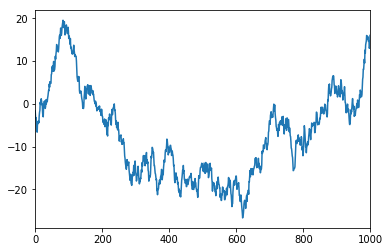

In [210]:
ts.plot()